We've covered simple linear regression, but that model is rather limited. It's extremely basic, dealing with only one outcome variable and one input. Most of the time we're interested in a relationship between more than two variables. So what can least squares regression do in that circumstance?

The answer is it can still do quite a lot. Least squares regression can handle almost any functional form you pass into it, it will simply estimate the coefficients.

## Multivariable Least Squares

When a least squares regression has more than one independent variable (or input) it is called multivariable least squares linear regression, multiple linear regression, or just multivariable regression. [Note that this is different from "multivariate" regression, which involves more than one _dependent_ variable.]

This type of model is used when there are multiple variables affecting your outcome. For example, let's think about rental costs. If we wanted to model the monthly rental cost of an apartment there are several factors that matter. We could do something simple, say:

$$ Rent = \alpha + SquareFootage $$

And that might not be a terrible model. It makes sense that as square footage of an apartment goes up so would the cost of rent. However, there's probably more to the story than that.

$$ Rent = \alpha + SquareFootage + Bedrooms + Bathrooms + YearBuilt $$

This would seem like a much more robust model. Now all of these relationships are still linear, meaning each additional bedroom affects rent in the same way. The delta to rent will be equivalent for moving from 1 to 2 bedrooms and from 11 to 12. Again, this is the nature of linear regression. As with the simpler models, here again the linear regression algorithm arrives at estimates for coefficients in front of each variable that minimize the sum of squared errors. We'll cover how that algorithm functions in more detail later.

## Categorical Variables

Not all variables have an obvious linear relationship, however. Categorical variables, for one, pose a unique problem here. A __categorical variable__, much like the outcomes we studied when working with classifiers, is a type or category. This can be something like a boolean {True, False} or state {WA, CA, OR, NV...}. Implying a single linear relationship between all of these values wouldn't make sense. Instead we treat each of them individually, allowing for each value to have its own associated coefficient. So if we wanted to include neighborhood in our example model we could do something like:

$$ Rent = \alpha + SquareFootage + Bedrooms + Bathrooms + YearBuilt + Neighborhood $$

In some languages, such as R, this is functionally sufficient and the algorithm will break neighborhood into categories for the various neighborhoods passed into the model. For Python, however, we have to do a little more work. Because these different categories are not linearly related, SKLearn wants separate binary __indicators__ for each. So for every categorical value we have to create a column that is 0 or 1 indicating if the observation is of that category.

To continue with our rent example, let's say our town was broken into three neighborhoods: Downtown, South, and North. Then our specification would look something like:

$$ Rent = \alpha + SquareFootage + Bedrooms + Bathrooms + YearBuilt + Downtown + South $$

There are a few things to note here. Firstly, one category will always be excluded. That's because it will be incorporated into the intercept (the $\alpha$) and we would otherwise run into collinearity problems, which we'll cover more in the next section. Also, each of these categories would typically be mutually exclusive, which makes sense. If a house is in the South, it shouldn't simultaneously be in the North.

Python offers you two real ways to deal with creating these indicators. The first is to do it manually. If this seems hard or complicated to you THEN YOU SHOULD ABSOLUTELY DO IT! It's good programming practice. However, SKLearn (of course) has a [built in function](http://scikit-learn.org/stable/modules/preprocessing.html) called `OneHotEncoder` that will also do this kind of data preparation.

## Linear doesn't have to mean lines...

Now it is worth noting that the model assumes a linear relationship between the predictors and the outcome, but the predictors themselves can take on more complicated forms. For example, if you specified a functional form of:

$$ y = \alpha + x + x^2 $$

That is perfectly doable in multivariable regression as long as you pass through a dataframe where one column is $x$ and the other column is $x^2$. It is not uncommon to see things like sine or cosine when dealing with a seasonal time series. You can get as complicated as you want, though be careful. Adding a lot of terms can destroy your model by violating the assumptions of OLS. We'll get into those assumptions in the next lesson.

## DRILL: Prepare the Data

[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  Robbery and Murder are currently continuous variables.  For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.  Don't forget basic data cleaning procedures, either!  Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import scipy.stats as stats
import warnings
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
data_path='https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'
df=pd.read_csv(data_path)
df.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0


In [3]:
# Removing the first three rows in the df
df=df.iloc[3:]
# Chaning the column names to row three values
df.columns=df.loc[3, :]
df=df.iloc[4:]
df.reset_index(drop=True, inplace=True)
# Rename column name to simple name
df.rename(columns={'Murder and\nnonnegligent\nmanslaughter': 'Murder'}, inplace=True)
df.rename(columns={'Property\ncrime': 'Property_crime'}, inplace=True)
df.head()

3,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
1,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN
2,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,36,0,NaN
3,Allegany Village,"1,781",3,0,NaN,0,0,3,10,0,10,0,0
4,Amherst Town,"118,296",107,1,NaN,7,31,68,"2,118",204,"1,882",32,3


In [4]:
#Creating a subset of dataframe with required columns only for simplicity and ease of handling
df_model=df.loc[:, ['City', 'Population', 'Property_crime', 'Murder', 'Robbery' ]]

#Covnerting the datatype of column into numeric for numeric operations
df_model["Population"] = df_model["Population"].str.replace("," , "")
df_model['Population']=pd.to_numeric(df_model['Population'])

df_model["Robbery"] = df_model["Robbery"].str.replace("," , "")
df_model['Robbery']=pd.to_numeric(df_model['Robbery'])

df_model["Property_crime"] = df_model["Property_crime"].str.replace("," , "")
df_model['Property_crime']=pd.to_numeric(df_model['Property_crime'])


df_model['Murder']=pd.to_numeric(df_model['Murder'])

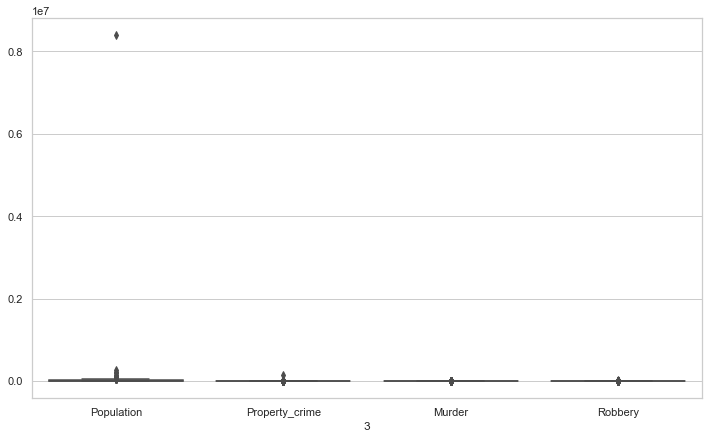

3        City  Population  Property_crime  Murder   Robbery
213  New York 8396126.000      141971.000 335.000 19170.000


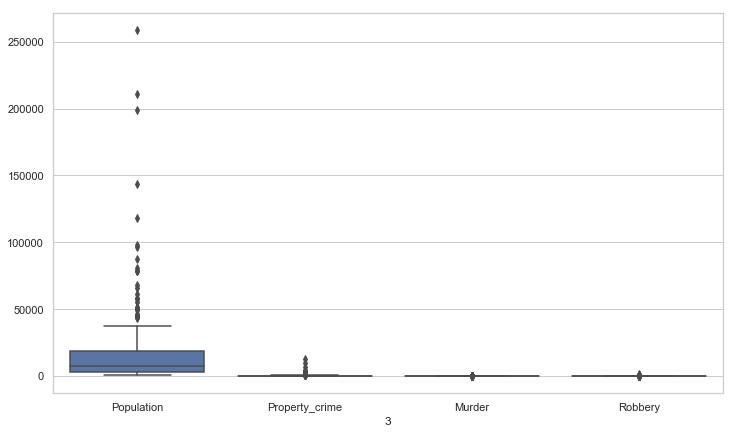

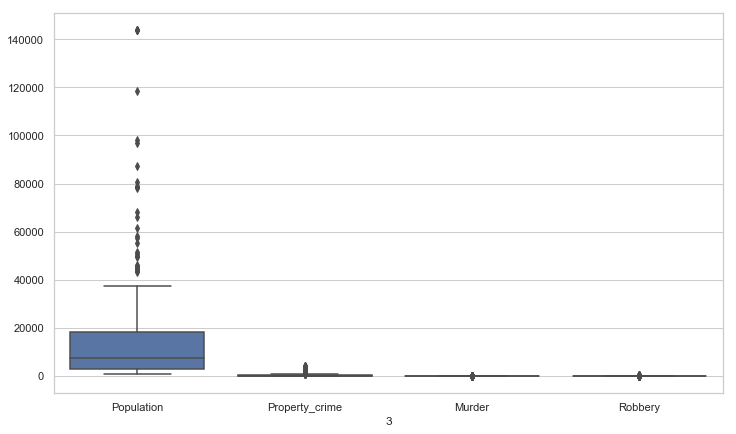

In [5]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style("whitegrid")
g=sns.boxplot(data=df_model)
plt.show()

print (df_model[df_model['Population'] > 1000000])
df_model=df_model[ df_model['Population']  < 1000000]

sns.set_style("whitegrid")
g=sns.boxplot(data=df_model)
plt.show()

for columns in df_model:
    stats.mstats.winsorize(df_model[columns], inplace=True, limits = [0.01, 0.01])

g=sns.boxplot(data=df_model)
plt.show()  

In [6]:
#Adding a feature required for the model
df_model['Popl_squared']=df_model['Population']*df_model['Population']

In [7]:
#Converting continuous variable into categorical variables
df_model['Murder_categ']=np.where(df_model['Murder'] > 0, 1, 0)
df_model['Robbery_categ']=np.where(df_model['Robbery'] > 0, 1, 0)
df_model.head()

3,City,Population,Property_crime,Murder,Robbery,Popl_squared,Murder_categ,Robbery_categ
0,Allegany Village,97956.000,4090.000,8.000,227.000,9595377936.000,1,1
1,Allegany Village,6388.000,223.000,0.000,4.000,40806544.000,0,1
2,Allegany Village,4089.000,46.000,0.000,3.000,16719921.000,0,1
3,Allegany Village,1781.000,10.000,0.000,0.000,3171961.000,0,0
4,Amherst Town,118296.000,2118.000,1.000,31.000,13993943616.000,1,1


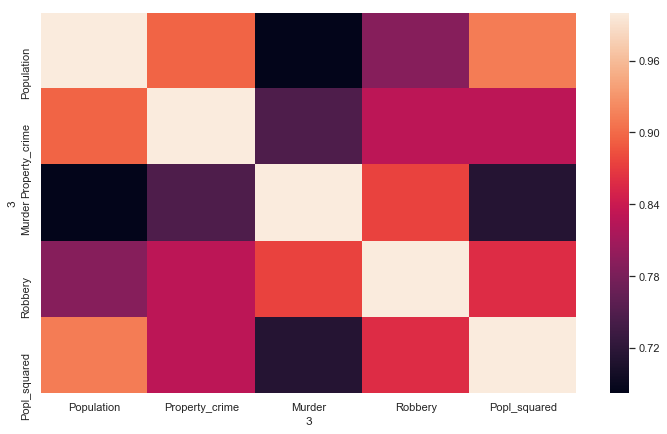

In [8]:
sns.heatmap(df_model.drop(['Murder_categ', 'Robbery_categ'], axis=1).corr())
plt.show()

In [9]:
#df_model['Popl_squared']=df_model['Popl_squared'].astype(np.int64, inplace=True)
df_model['Popl_squared'] = pd.to_numeric(df_model['Popl_squared'])
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 344
Data columns (total 8 columns):
City              344 non-null object
Population        344 non-null float64
Property_crime    344 non-null float64
Murder            344 non-null float64
Robbery           344 non-null float64
Popl_squared      344 non-null float64
Murder_categ      344 non-null int32
Robbery_categ     344 non-null int32
dtypes: float64(5), int32(2), object(1)
memory usage: 21.5+ KB


In [25]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
y=df_model['Property_crime']
x=df_model[['Population', 'Popl_squared', 'Murder_categ', 'Robbery_categ']]

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print ("R-Squared: \n", regr.score(x,y))


Coefficients: 
 [1.94112201e-02 3.43559694e-08 1.74001853e+02 5.79544385e+01]
Intercept: 
 -42.984895807831606
R-Squared: 
 0.8129213527949086


In [26]:
df_model.head()

3,City,Population,Property_crime,Murder,Robbery,Popl_squared,Murder_categ,Robbery_categ,Mur_Rob_category
0,Allegany Village,97956.000,4090.000,8.000,227.000,9595377936.000,1,1,Murder_Robbery
1,Allegany Village,6388.000,223.000,0.000,4.000,40806544.000,0,1,Robbery
2,Allegany Village,4089.000,46.000,0.000,3.000,16719921.000,0,1,Robbery
3,Allegany Village,1781.000,10.000,0.000,0.000,3171961.000,0,0,No Crime
4,Amherst Town,118296.000,2118.000,1.000,31.000,13993943616.000,1,1,Murder_Robbery


In [27]:
#Creating a new categorical feature that summarises the two features, Murder and robbery for plotting purpose
df_model.loc[(df_model.Murder_categ > 0) & (df_model.Robbery_categ < 1)  , 'Mur_Rob_category'] = 'Murder' 
df_model.loc[(df_model.Murder_categ < 1) & (df_model.Robbery_categ > 0)  , 'Mur_Rob_category'] = 'Robbery' 
df_model.loc[(df_model.Murder_categ > 0) & (df_model.Robbery_categ > 0)  , 'Mur_Rob_category'] = 'Murder_Robbery' 
df_model.loc[(df_model.Murder_categ < 1) & (df_model.Robbery_categ < 1)  , 'Mur_Rob_category'] = 'No Crime' 

In [28]:
df_model.head()

3,City,Population,Property_crime,Murder,Robbery,Popl_squared,Murder_categ,Robbery_categ,Mur_Rob_category
0,Allegany Village,97956.000,4090.000,8.000,227.000,9595377936.000,1,1,Murder_Robbery
1,Allegany Village,6388.000,223.000,0.000,4.000,40806544.000,0,1,Robbery
2,Allegany Village,4089.000,46.000,0.000,3.000,16719921.000,0,1,Robbery
3,Allegany Village,1781.000,10.000,0.000,0.000,3171961.000,0,0,No Crime
4,Amherst Town,118296.000,2118.000,1.000,31.000,13993943616.000,1,1,Murder_Robbery


C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


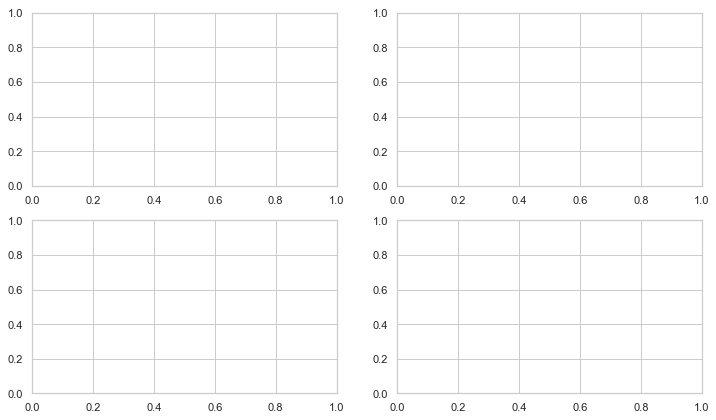

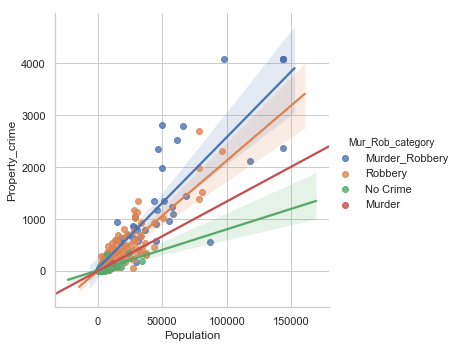

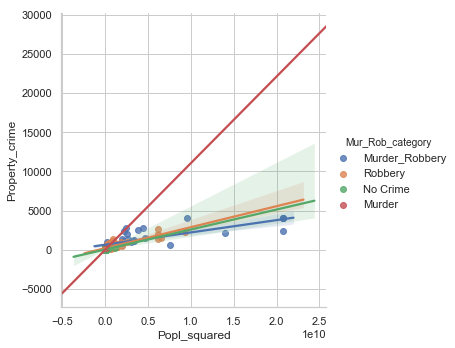

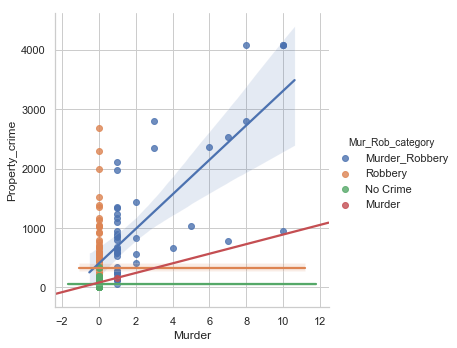

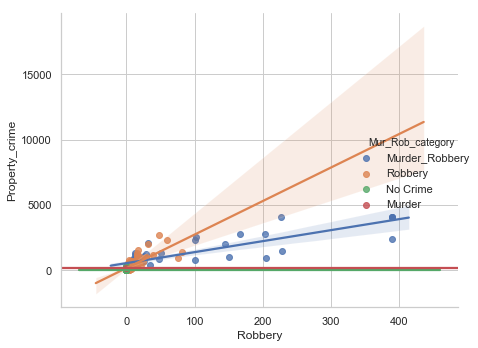

In [29]:
names=['Population', 'Popl_squared','Murder', 'Robbery']
fig=plt.figure()
for i in range (1,len(names)+1):
    fig.add_subplot(int(str(22)+str(i)))
    sns.lmplot(x=names[i-1], y='Property_crime',hue='Mur_Rob_category', data=df_model)
    
plt.tight_layout()
plt.show()

In [30]:
regr.predict([[1781.000, 3171961.000, 0, 0]])

array([-8.30453694])

In [31]:
#Cross validation and checking if there is a significant difference in the accuracy
from sklearn.model_selection import cross_val_score
score=cross_val_score(regr, x, y, cv=10)
print (score)

[0.84376627 0.87374564 0.29951354 0.78168064 0.77148333 0.73314639
 0.57585534 0.81224161 0.89351187 0.63153858]


In [32]:
test, p = stats.chisquare(score)

In [33]:
# interpreting the chisquare results
alpha = 0.05

print ("The Hypothesis H0: Scores are tight and model is accurate with no overfitting\n")

if p > alpha:
	print('Scores are tight with mentioned p value (fail to reject H0)    p=', p)
else:
	print('RESULT:\n The scores are not tight and vary a lot (reject H0)   p=', p)

The Hypothesis H0: Scores are tight and model is accurate with no overfitting

Scores are tight with mentioned p value (fail to reject H0)    p= 0.9999882257646168


In [20]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 344
Data columns (total 9 columns):
City                344 non-null object
Population          344 non-null float64
Property_crime      344 non-null float64
Murder              344 non-null float64
Robbery             344 non-null float64
Popl_squared        344 non-null float64
Murder_categ        344 non-null int32
Robbery_categ       344 non-null int32
Mur_Rob_category    344 non-null object
dtypes: float64(5), int32(2), object(2)
memory usage: 24.2+ KB


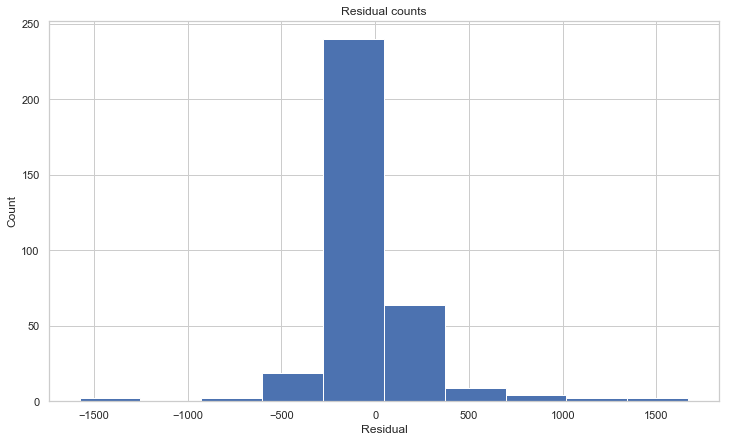

In [34]:
#Checking multivariate normality in the error of the model
# Extract predicted values.
predicted = regr.predict(x).ravel()
actual = df_model['Property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning need to check if it normal or not quantitatively
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [36]:
# Shapiro-Wilk Test for checking if a distribution is normal
from scipy.stats import shapiro
stat, p = shapiro(residual)
print('Statistics=%.3f, p=%.5f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.740, p=0.00000
Sample does not look Gaussian (reject H0)


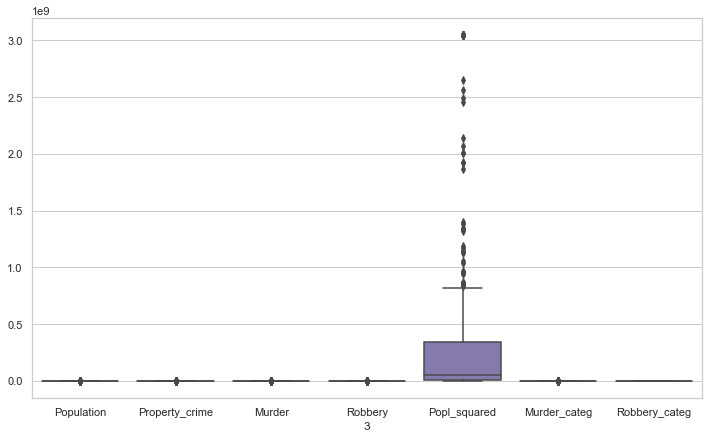

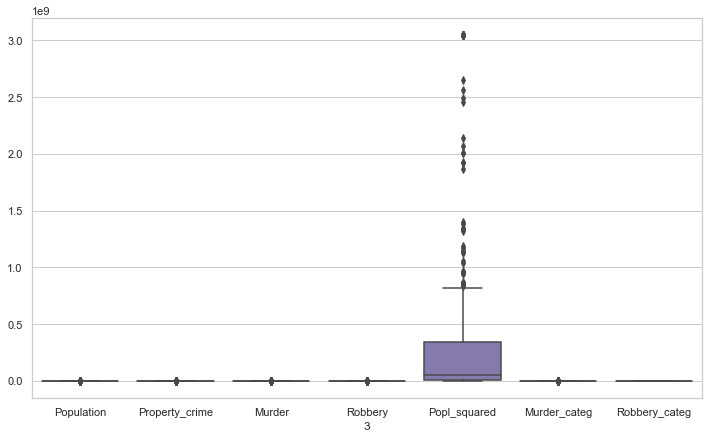

Coefficients: 
 [1.11159364e-02 1.66076746e-07 8.63881692e+01 9.82338032e+01]
Intercept: 
 -9.86294380598315
R-Squared: 
 0.8157462679071285


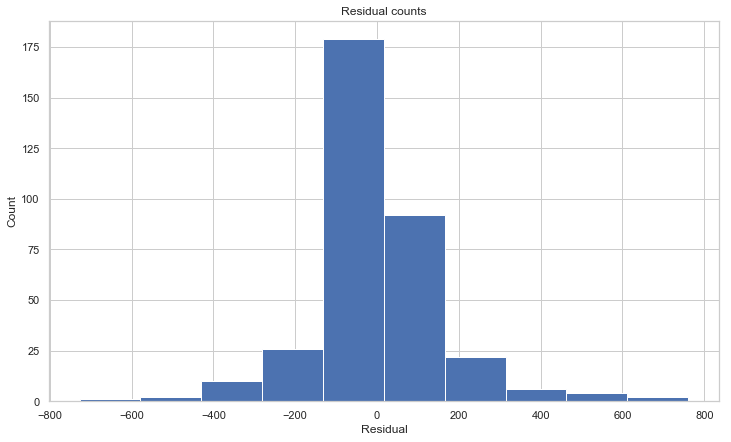

In [41]:
# For fixing the multivariate non-normality of the errors...we can remove the outliers 
#or winsorize them


# Box plot before winsorizing
sns.set_style("whitegrid")
g=sns.boxplot(data=df_model)
plt.show()

for columns in df_model:
    stats.mstats.winsorize(df_model[columns], inplace=True, limits = [0.01, 0.05])

# Box plot after winsorizing

sns.set_style("whitegrid")
g=sns.boxplot(data=df_model)
plt.show()

# Instantiate and fit model
regr = linear_model.LinearRegression()
y=df_model['Property_crime']
x=df_model[['Population', 'Popl_squared', 'Murder_categ', 'Robbery_categ']]

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print ("R-Squared: \n", regr.score(x,y))

#Checking multivariate normality in the error of the model
# Extract predicted values.
predicted = regr.predict(x).ravel()
actual = df_model['Property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


In [42]:
# Shapiro-Wilk Test for checking if a distribution is normal
from scipy.stats import shapiro
stat, p = shapiro(residual)
print('Statistics=%.3f, p=%.5f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.893, p=0.00000
Sample does not look Gaussian (reject H0)


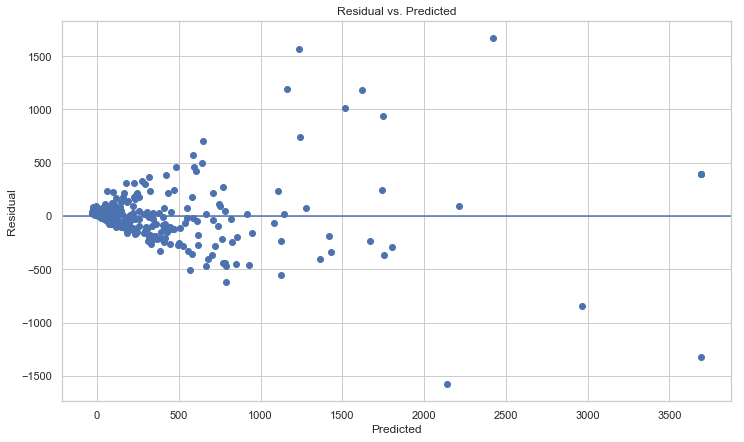

In [37]:
#Checking homoscedascity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
